In [15]:
# coding: utf-8
import sys, os # OSでディレクトリを変更したりするためのパッケージをインポート
#sys.path.append(os.pardir)　#１つ上の階層のディレクトリ内にあるものを読み込めるようにしておけ、という命令（今回はdeep-learning-from-scratch-master）
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist#mnist.pyの中に書かれている関数を使えるようにしろ、という命令、後半はその中からload_mnistをもってこいと命令
from two_layer_net import TwoLayerNet

# データの読み込み　
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)#番地に名前をつけて、環境変数とした
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)#初期化したネットワークを生成

iters_num = 10000 #バッチの繰り返し回数
train_size = x_train.shape[0] #訓練データの数
batch_size = 100#１つのバッチに入っている訓練データの数　　100＊10000の文字読み込みして1つの文字につき、１回の順伝播と逆伝播をする＊延べ１００万回
learning_rate = 0.1#勾配降下する際の掛け率

train_loss_list = []# ここでは枠だけ作っている
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)#訓練データ60,000/バッチサイズ１００  600バッチ繰り返し/1epoch
W1history=[]
W2history=[]
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size) # 0〜５９，９９９の整数のうち、バッチサイズの数分、ランダムに取り出せ（重複あり）　⭐️
    x_batch = x_train[batch_mask]#batch_mask できめた番号のデータをx_batch という環境変数に入れる
    t_batch = t_train[batch_mask]#batch_mask の番号に従った取り出し方をした被説明変数（訓練ラベル）のみのリストで、上の説明変数の順序に対応
    
    # 勾配
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    W1history.append(network.params['W1'])#1バッチごとにW1history.に行列（weight matrix）を記録（アペンド）
    W2history.append(network.params['W2'])#1バッチごとにW2history.に行列（weight matrix）を記録（アペンド）
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:#イテレーションの数（600バッチ繰り返し）が600の倍数だった場合に以下のことを行え
 
        train_acc = network.accuracy(x_train, t_train)#two_layer_net.pyを参照
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)#.appendはlist（train_acc）の後ろに新しい数字を加えろ（今回はtrain_acc）　６００バッチ(1epoch)ごとに正答率だせ
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)#10000バッチ/600バッチ＝16.7epochが出力されている

0.1415 0.1451
0.9018 0.9063
0.9233333333333333 0.9257
0.9347 0.9355
0.94395 0.9419
0.9482166666666667 0.9432
0.9552666666666667 0.9508
0.95975 0.9537
0.96405 0.9561
0.9673666666666667 0.9602
0.9701333333333333 0.9616
0.97145 0.9629
0.9737833333333333 0.9653
0.9744833333333334 0.9671
0.9770666666666666 0.9689
0.9773 0.9699
0.9782 0.9692


In [9]:
W1history[0]

array([[-3.84410170e-03, -7.83343624e-04, -2.02522500e-02, ...,
        -2.45532402e-03,  7.65641777e-03, -4.54156356e-03],
       [-8.85163646e-03,  1.21833373e-02,  5.03240294e-03, ...,
        -2.31776473e-02, -2.07549750e-02, -9.23269795e-05],
       [-3.46426718e-03, -7.41808165e-03, -1.93704302e-02, ...,
        -7.41004334e-04,  7.24132350e-03,  1.08133616e-04],
       ...,
       [-9.18664886e-03, -5.58960994e-03, -6.08335505e-03, ...,
         5.10472274e-03,  1.35361852e-02, -1.18042940e-02],
       [ 2.33790100e-03,  2.72261487e-03,  3.15191102e-03, ...,
        -4.43319931e-03,  1.83061367e-03, -1.76791809e-04],
       [-1.27957924e-02, -1.55837897e-03,  5.22171126e-03, ...,
         1.83753893e-02, -2.07202487e-03,  3.10021135e-04]])

In [33]:
np.random.choice(train_size, batch_size)

array([ 8008, 48658, 35648, 35489, 49204, 57844, 42356, 59831, 50527,
       29361, 42654, 40339, 29219, 14832, 59765,  3310, 14413, 10604,
       31005, 54248, 49267, 14935, 35876, 50378, 30792, 27980,  9026,
        9040, 57624, 14659, 56606, 46236, 19104, 39593,  7968, 31804,
        3657, 38704, 42052, 38655, 55714,   829, 18042,  4377,  2669,
       21769, 57364, 37756, 35478, 19865, 55515, 22083, 20649, 43518,
       44141, 58630, 43182, 48300, 35258,  8098, 35876, 35071,  1649,
       50271, 46676, 41753, 58781, 59688, 23096, 11251,  3834, 22447,
       32969, 21777,  4103, 58692, 45635, 50406,  5150, 33766, 22289,
        3998, 18385,  3764, 34591, 26979, 28323, 35963,  9463,   349,
       31318, 49133, 14839, 44147,  4536, 40204, 16010,  1857, 34122,
       42512])

In [4]:
import numpy

a = [[3, 4, 5], [6, 7, 8], [9, 10, 11]]
nda = numpy.array(a)

a2 = [[-3, -4, -5], [-6, -7, -8], [-9, -10, -11]]
nda2 = numpy.array(a2)

with open('output.txt', 'a') as f_handle:
    numpy.savetxt(f_handle, nda)
    numpy.savetxt(f_handle, nda2)

In [16]:
import pickle
import random

f = open('W1history.txt', 'wb')
pickle.dump(W1history, f)


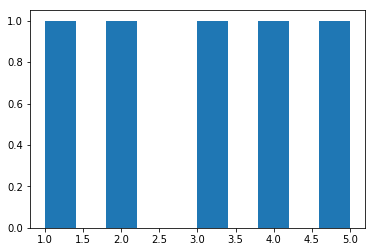

In [21]:
import matplotlib.pyplot
matplotlib.pyplot.hist(np.array([1,2,3,4,5]))
matplotlib.pyplot.show()

In [ ]:
W1history

In [17]:
f = open('W1history2.txt', 'w')
for x in W1history:
    f.write(str(x) + "\n")
f.close()

[-0.00491572 -0.00491572 -0.00491572 ... -0.00491572 -0.00491572
 -0.00491572]
10000


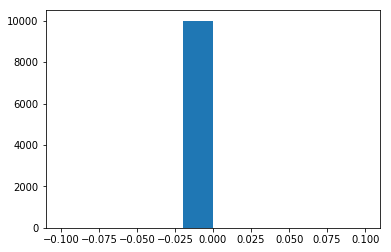

In [41]:
W1history[2][6][3]#3回更新後の、６（７）行目の3（4）列目を表示　　
#３番ユニットに入る時の重みベクトルで、第１層にあるの説明変数６番目（７番目）のにつけられる重み　　つまりW47を三回更新した後の重みの値を表示

hoge=[]
for i in range(len(W1history)):
    hoge.append(W1history[i][6][3])
fuga=np.array(hoge)

print(fuga)
print(len(fuga))

import matplotlib.pyplot
matplotlib.pyplot.hist(fuga,bins=[-0.1,-0.08,-0.06,-0.04,-0.02,0,0.02,0.04,0.06,0.08,0.1])
matplotlib.pyplot.show()


In [42]:
max(fuga)-min(fuga)


0.0

In [14]:
f = open("W1history.txt","rb")
sampling = pickle.load(f)
print(sampling)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
np.random.choice(10, 7)

array([0, 5, 5, 0, 5, 4, 4])

In [37]:
import os
os.getcwd()

'/Users/kensyo/Desktop/deep-learning-from-scratch-master/ch05'

In [26]:
max(train_size / batch_size, 1)

600.0

In [22]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
len( load_mnist()[0][0]) #個数をカウントする場合、len() は１つ下の階層の個数を数える　この場合は丁目と番地を指定しているので何号まであるかを出力

60000

In [11]:
 load_mnist()[0][0][6] #6番目の画像データをピクセルデータとして出力

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
 load_mnist()[0][1][6] #6番目の画像データのラベルをピクセルデータとして出力

1

In [20]:
 load_mnist(normalize=False,flatten=False)[0][0][6].shape

(1, 28, 28)